In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [1]:
import os

os.environ["KAGGLE_API_TOKEN"] = "KGAT_a87bbf8db37a1b522daa43034826797a"


In [2]:
!pip install kaggle

In [4]:
import json
import os

kaggle_json = {
    "username": "token",
    "key": "KGAT_a87bbf8db37a1b522daa43034826797a"
}

os.makedirs("/root/.config/kaggle", exist_ok=True)

with open("/root/.config/kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_json, f)


In [5]:
!chmod 600 /root/.config/kaggle/kaggle.json


In [6]:
!kaggle datasets list | head


ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                             Chocolate Sales                                         468320  2026-01-04 14:23:35.490000          12336        205  1.0              
sonalshinde123/work-from-home-employee-burnout-dataset          Work From Home Employee Burnout Dataset                  27962  2026-01-31 03:28:22.227000            761         31  1.0              
rockyt07/social-media-user-analysis                             Social Media User Analysis                           247842357  2026-01-14 02:28:41.970000           7264        148  1.0              


In [7]:
!kaggle datasets download -d kunalgupta2616/boat-types-recognition


Dataset URL: https://www.kaggle.com/datasets/kunalgupta2616/boat-types-recognition
License(s): GPL-2.0
 93% 390M/421M [00:02<00:00, 87.1MB/s]
100% 421M/421M [00:02<00:00, 150MB/s] 


In [8]:
!unzip boat-types-recognition.zip -d boat_dataset


Archive:  boat-types-recognition.zip
  inflating: boat_dataset/boat-types-recognition/buoy/alaska-ocean-warning-light-sea-2574393.jpg  
  inflating: boat_dataset/boat-types-recognition/buoy/anchor-warp-rope-buoy-beach-2881563.jpg  
  inflating: boat_dataset/boat-types-recognition/buoy/beach-buoy-w-water-sea-ocean-1042883.jpg  
  inflating: boat_dataset/boat-types-recognition/buoy/beacon-lighthouse-coast-navigation-39232.jpg  
  inflating: boat_dataset/boat-types-recognition/buoy/blue-boat-buoy-floating-2834157.jpg  
  inflating: boat_dataset/boat-types-recognition/buoy/blue-buoy-float-navigation-ocean-20511.jpg  
  inflating: boat_dataset/boat-types-recognition/buoy/boat-water-bird-beach-sand-2840152.jpg  
  inflating: boat_dataset/boat-types-recognition/buoy/bojka-buoy-water-bojka-rescue-882679.jpg  
  inflating: boat_dataset/boat-types-recognition/buoy/buoy-beach-sea-buoys-scenic-242727.jpg  
  inflating: boat_dataset/boat-types-recognition/buoy/buoy-beacon-sea-beach-sand-2266571.jpg

In [9]:
!ls boat_dataset


boat-types-recognition


In [10]:
!ls boat_dataset/boat-types-recognition


 buoy	       'ferry boat'     gondola		   kayak	 sailboat
'cruise ship'  'freight boat'  'inflatable boat'  'paper boat'


In [11]:
!mv boat_dataset/boat-types-recognition boat_dataset/raw


In [12]:
!ls boat_dataset/raw


 buoy	       'ferry boat'     gondola		   kayak	 sailboat
'cruise ship'  'freight boat'  'inflatable boat'  'paper boat'


In [13]:
import os, shutil, random

source_dir = "boat_dataset/raw"
train_dir = "dataset/train"
val_dir = "dataset/validation"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for cls in os.listdir(source_dir):
    cls_path = os.path.join(source_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    images = os.listdir(cls_path)
    random.shuffle(images)

    split = int(0.8 * len(images))
    train_imgs = images[:split]
    val_imgs = images[split:]

    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(cls_path, img),
                    os.path.join(train_dir, cls, img))

    for img in val_imgs:
        shutil.copy(os.path.join(cls_path, img),
                    os.path.join(val_dir, cls, img))


In [14]:
!ls dataset/train


 buoy	       'ferry boat'     gondola		   kayak	 sailboat
'cruise ship'  'freight boat'  'inflatable boat'  'paper boat'


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [16]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [17]:
train_data = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    "dataset/validation",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 1166 images belonging to 9 classes.
Found 296 images belonging to 9 classes.


In [19]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - accuracy: 0.2479 - loss: 2.8015 - val_accuracy: 0.3615 - val_loss: 1.7502
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.3634 - loss: 1.7896 - val_accuracy: 0.4122 - val_loss: 1.6513
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - accuracy: 0.3864 - loss: 1.7350 - val_accuracy: 0.4189 - val_loss: 1.6543
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.4262 - loss: 1.6718 - val_accuracy: 0.4764 - val_loss: 1.4854
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.4865 - loss: 1.5869 - val_accuracy: 0.5270 - val_loss: 1.4601
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.5139 - loss: 1.4991 - val_accuracy: 0.5405 - val_loss: 1.4260
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.5205 - loss: 1.4454 - val_accuracy: 0.5270 - val_loss: 1.4998
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.5186 - loss: 1.4258 - val_accuracy: 0.5541 - v

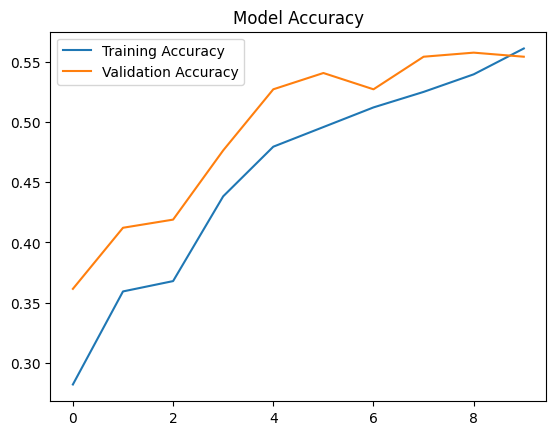

In [23]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


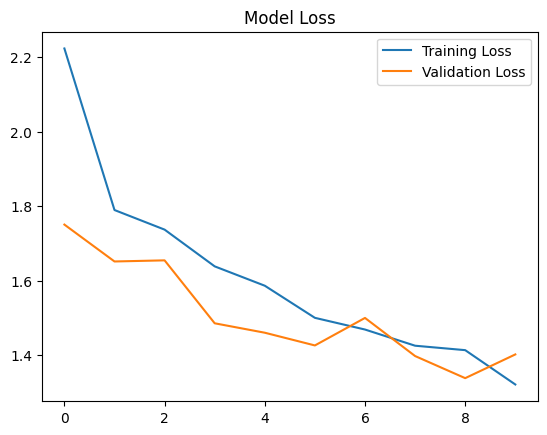

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [26]:
model.save("venice_boat_cnn.h5")


This project applies supervised learning using a Convolutional Neural Network (CNN) to classify boat images into multiple categories. The dataset was sourced from Kaggle and processed within Google Colab using cloud-based resources. Image augmentation techniques were applied to improve generalization. The trained model demonstrates the effectiveness of CNNs in solving image classification problems.

In [27]:
!ls


boat_dataset		    dataset	 venice_boat_cnn.h5
boat-types-recognition.zip  sample_data


In [30]:
from google.colab import drive
drive.mount('/content/drive')

!cp venice_boat_cnn.h5 /content/drive/MyDrive/venice_boat_cnn.h5


Mounted at /content/drive
